# Tarea2
### Preprocesamiento de datos
##### Luis Enrique López Nerio 1487280

Versión de python que estoy usando


In [194]:
import sys
print(sys.version)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


librerias

In [195]:
import pandas as pd
import re
import numpy as np
from textblob import TextBlob

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
import string
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() 
nltk.download('wordnet')


nltk.download('punkt')
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

sns.set()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


#### Lectura de la base
La base cuenta con tres columnas: 
| Estrellas | Comentario | URL |
|-----------|------------|-----|
1. Lectura de base y limpieza de la base
2. Preprocesamiento


In [196]:
base

,stars,comment,book_url,LongitudComentario,sentimiento1,comment_clean,Polaridad_textBlob,sentimiento_textBlob,Sentiment_Vader,sentimiento_Vader,POS tagged,sentimiento_sentinet
0,5.0,Let me say at the outset of this review that I...,https://www.amazon.com/dp/1492041130,257,Positive,let say outset review respect author sheer gui...,0.233069,Positive,0.3487,Neutral,"[(let, v), (say, v), (outset, v), (review, n),...",Positive
1,1.0,Its Capitalism at its best I read the book fro...,https://www.amazon.com/dp/1492041130,194,Negative,capitalism best read book nearby bookstore lik...,0.227005,Positive,0.9503,Positive,"[(capitalism, n), (best, a), (read, a), (book,...",Positive
2,5.0,If youre looking to get started with data scie...,https://www.amazon.com/dp/1492041130,61,Positive,youre looking get started data science youre c...,0.108333,Positive,0.4215,Neutral,"[(youre, n), (looking, v), (get, n), (started,...",Neutral
3,4.0,In general this is a good book It covers a wid...,https://www.amazon.com/dp/1492041130,106,Neutral,general good book cover wide variety topic go ...,0.057509,Positive,0.7255,Positive,"[(general, a), (good, a), (book, n), (cover, n...",Positive
4,5.0,I was an academic data scientist decades befor...,https://www.amazon.com/dp/1492041130,149,Positive,academic data scientist decade term coined lov...,0.317308,Positive,0.9670,Positive,"[(academic, a), (data, n), (scientist, n), (de...",Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
20642,3.0,This book offers nice information and thoughts...,https://www.amazon.com/dp/0980200482,28,Neutral,book offer nice information thought thinking b...,0.266667,Positive,-0.1531,Neutral,"[(book, n), (offer, n), (nice, a), (informatio...",Neutral
20643,5.0,Am disabled retired RN but always wished I was...,https://www.amazon.com/dp/0980200482,25,Positive,disabled retired rn always wished librarian pe...,-0.200000,Negative,0.9022,Positive,"[(disabled, a), (retired, v), (rn, n), (always...",Negative
20644,3.0,At one point I considered library work as oppo...,https://www.amazon.com/dp/0980200482,84,Neutral,one point considered library work opposed work...,0.212500,Positive,0.4939,Neutral,"[(one, None), (point, n), (considered, v), (li...",Positive
20645,5.0,Overall I think this is an excellent resource ...,https://www.amazon.com/dp/0980200482,89,Positive,overall think excellent resource anyone pursui...,0.488889,Positive,0.9719,Positive,"[(overall, a), (think, v), (excellent, a), (re...",Positive


In [197]:
base = pd.read_csv('..//Tarea1/Reviews.csv', quotechar="\"", dtype = {'stars':'str'})
base['comment'] = base['comment'].apply(lambda x: re.sub('[^a-zA-Z ]','',x))
base['LongitudComentario'] = base['comment'].apply(lambda x: len(str(x).split()))
base['sentimiento1'] = np.where(base['stars'].isin(['4.0', '5.0']),'Positive', np.where( base['stars'].isin([ '3.0']), 'Neutral', 'Negative'  )     )

In [198]:
def preprocesamiento(comentario):
    comentario =  re.sub('[^a-zA-Z]',' ',comentario)
    palabras = word_tokenize(comentario)
    palabras = [palabra.lower() for palabra in palabras ]
    
    #palabras = [palabra.translate(tabla) for palabra in palabras]
    palabras = [palabra for palabra in palabras if palabra.isalpha()]
    palabras = [palabra for palabra in palabras if not palabra in stop_words]
    palabras = [lemmatizer.lemmatize(palabra) for palabra in palabras]
    palabras = " ".join(palabras)
    return palabras

In [199]:
base['comment_clean']= base['comment'].apply(lambda x:preprocesamiento(x))

In [200]:
base.dtypes

stars                 object
comment               object
book_url              object
LongitudComentario     int64
sentimiento1          object
comment_clean         object
dtype: object

textblob

In [201]:


# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [202]:
base['Polaridad_textBlob']  = base['comment_clean'].apply(lambda x: getPolarity(x))
base['sentimiento_textBlob'] = base['Polaridad_textBlob'].apply(lambda x: analysis(x))

Vader

In [203]:

analyzer = SentimentIntensityAnalyzer()


def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']


# function to analyse 
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    

base['Sentiment_Vader'] = base['comment_clean'].apply(vadersentimentanalysis)
base['sentimiento_Vader'] = base['Sentiment_Vader'].apply(vader_analysis)

Sentynet

In [204]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}


In [205]:
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

In [206]:

base['POS tagged'] = base['comment_clean'].apply(token_stop_pos)

In [207]:
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return "Neutral"
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

In [208]:
base['sentimiento_sentinet'] = base['POS tagged'].apply(sentiwordnetanalysis)
#base.head(5)

In [209]:
base.dtypes

stars                    object
comment                  object
book_url                 object
LongitudComentario        int64
sentimiento1             object
comment_clean            object
Polaridad_textBlob      float64
sentimiento_textBlob     object
Sentiment_Vader         float64
sentimiento_Vader        object
POS tagged               object
sentimiento_sentinet     object
dtype: object

Gráficas

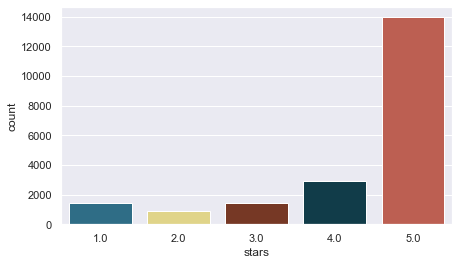

In [210]:
order_list = ['1.0', '2.0', '3.0', '4.0', '5.0']
fig = plt.figure(figsize = (7,4))
ax = sns.countplot(data = base, x = 'stars', order=order_list,palette=['#207394','#eede7b', '#833118','#084152','#cd5241'])

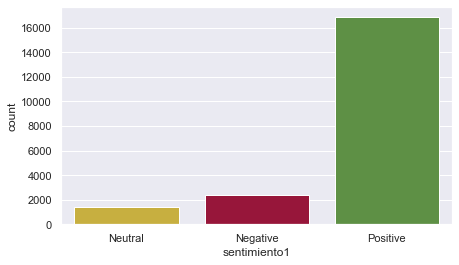

In [211]:

fig = plt.figure(figsize = (7,4))
order_list = ['Neutral', 'Negative', 'Positive']
ax = sns.countplot(data = base, x = 'sentimiento1',order=order_list, palette=[ '#debd29', '#ac0031','#5a9c39'])

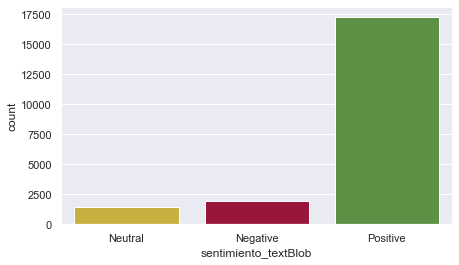

In [212]:

fig = plt.figure(figsize = (7,4))
order_list = ['Neutral', 'Negative', 'Positive']
ax = sns.countplot(data = base, x = 'sentimiento_textBlob',order= order_list, palette=[ '#debd29', '#ac0031','#5a9c39'])

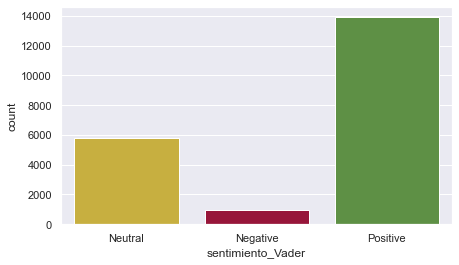

In [213]:
fig = plt.figure(figsize = (7,4))
order_list = ['Neutral', 'Negative', 'Positive']
ax = sns.countplot(data = base, x = 'sentimiento_Vader',order= order_list, palette=[ '#debd29', '#ac0031','#5a9c39'])

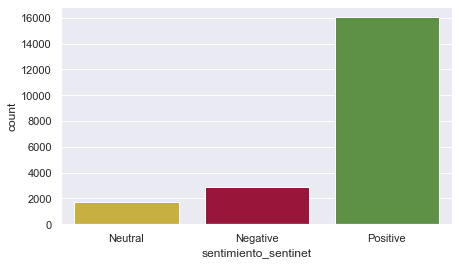

In [214]:
fig = plt.figure(figsize = (7,4))
order_list = ['Neutral', 'Negative', 'Positive']
ax = sns.countplot(data = base, x = 'sentimiento_sentinet',order= order_list, palette=[ '#debd29', '#ac0031','#5a9c39'])

In [215]:
base_2 = base[['sentimiento1','sentimiento_textBlob', 'sentimiento_Vader','sentimiento_sentinet']].melt()
base_2

,variable,value
0,sentimiento1,Positive
1,sentimiento1,Negative
2,sentimiento1,Positive
3,sentimiento1,Positive
4,sentimiento1,Positive
...,...,...
82583,sentimiento_sentinet,Neutral
82584,sentimiento_sentinet,Negative
82585,sentimiento_sentinet,Positive
82586,sentimiento_sentinet,Positive


Text(0.5, 1.0, 'Sentimiento Sentinet')

<Figure size 720x504 with 0 Axes>

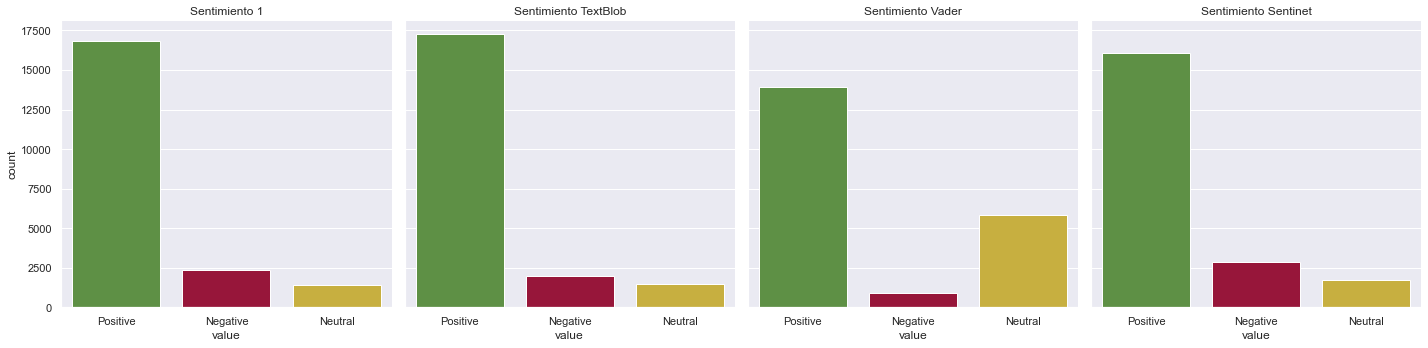

In [216]:

fig = plt.figure(figsize = (10,7))
order_list = ['Neutral', 'Negative', 'Positive']
ax = sns.catplot(x= 'value', col="variable",kind='count', data=base_2, palette=[ '#5a9c39', '#ac0031','#debd29'])

axes = ax.axes.flatten()
axes[0].set_title("Sentimiento 1")
axes[1].set_title("Sentimiento TextBlob")
axes[2].set_title("Sentimiento Vader")
axes[3].set_title("Sentimiento Sentinet")

In [217]:
from sklearn.metrics import confusion_matrix
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
c= confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

In [218]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         ant       0.67      1.00      0.80         2
        bird       0.00      0.00      0.00         1
         cat       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.44      0.56      0.49         6
weighted avg       0.56      0.67      0.60         6



c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Matriz de Confución- Random Forest')

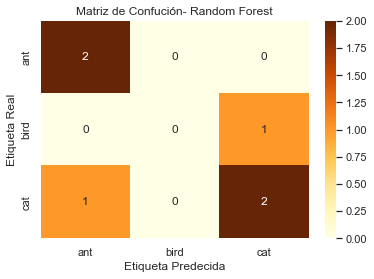

In [219]:
sns.heatmap(c,annot=True, cmap="YlOrBr", fmt="d", 
            xticklabels =["ant", "bird", "cat"], 
            yticklabels = ["ant", "bird", "cat"])
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predecida')
plt.title("Matriz de Confución- Random Forest")

In [220]:
y_real = base['sentimiento1']
y_pred_text_blob =base['sentimiento_textBlob']
y_pred_vader = base['sentimiento_Vader']
y_pred_sentinet = base['sentimiento_sentinet']

              precision    recall  f1-score   support

    Negative       0.44      0.37      0.40      2359
     Neutral       0.06      0.06      0.06      1431
    Positive       0.86      0.88      0.87     16857

    accuracy                           0.77     20647
   macro avg       0.46      0.44      0.45     20647
weighted avg       0.76      0.77      0.76     20647



Text(0.5, 1.0, 'Matriz de Confución- Random Forest')

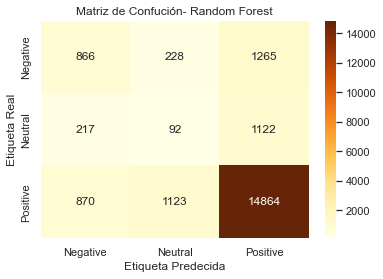

In [221]:
m1 = confusion_matrix(y_real, y_pred_text_blob)
print(classification_report(y_real, y_pred_text_blob))

sns.heatmap(m1,annot=True, cmap="YlOrBr", fmt="d", 
            xticklabels =["Negative", "Neutral", "Positive"], 
            yticklabels = ["Negative", "Neutral", "Positive"])
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predecida')
plt.title("Matriz de Confución- Random Forest")

              precision    recall  f1-score   support

    Negative       0.48      0.19      0.27      2359
     Neutral       0.10      0.40      0.16      1431
    Positive       0.89      0.73      0.80     16857

    accuracy                           0.65     20647
   macro avg       0.49      0.44      0.41     20647
weighted avg       0.79      0.65      0.70     20647



Text(0.5, 1.0, 'Matriz de Confución- Random Forest')

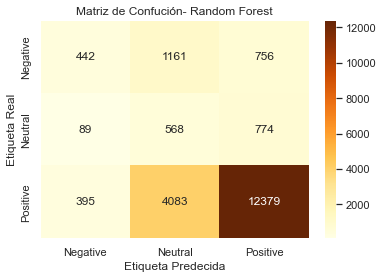

In [222]:
m2 = confusion_matrix(y_real, y_pred_vader)
print(classification_report(y_real, y_pred_vader))

sns.heatmap(m2,annot=True, cmap="YlOrBr", fmt="d", 
            xticklabels =["Negative", "Neutral", "Positive"], 
            yticklabels = ["Negative", "Neutral", "Positive"])
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predecida')
plt.title("Matriz de Confución- Random Forest")

              precision    recall  f1-score   support

    Negative       0.30      0.36      0.33      2359
     Neutral       0.06      0.08      0.07      1431
    Positive       0.86      0.82      0.84     16857

    accuracy                           0.71     20647
   macro avg       0.41      0.42      0.41     20647
weighted avg       0.74      0.71      0.72     20647



Text(0.5, 1.0, 'Matriz de Confución- Random Forest')

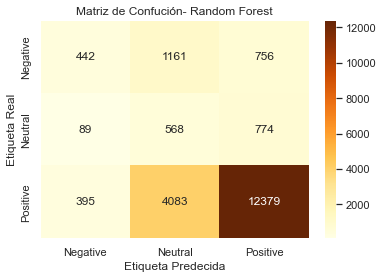

In [223]:
m3 = confusion_matrix(y_real, y_pred_sentinet)
print(classification_report(y_real, y_pred_sentinet))

sns.heatmap(m2,annot=True, cmap="YlOrBr", fmt="d", 
            xticklabels =["Negative", "Neutral", "Positive"], 
            yticklabels = ["Negative", "Neutral", "Positive"])
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predecida')
plt.title("Matriz de Confución- Random Forest")

In [224]:
base.sentimiento1.value_counts()

Positive    16857
Negative     2359
Neutral      1431
Name: sentimiento1, dtype: int64

In [225]:
y_real

0        Positive
1        Negative
2        Positive
3        Positive
4        Positive
           ...   
20642     Neutral
20643    Positive
20644     Neutral
20645    Positive
20646    Positive
Name: sentimiento1, Length: 20647, dtype: object